**Types of digital images:**

There are typically three types of digital images.

•	Binary Images

•	Gray Scale Images

•	Color Images

We can describe image as a function f where x belongs to [a,b] and y belongs to [c,d] which returns as output ranging between maximum and minimum pixel intensity values.

So, it can be stated as, f: [a,b] * [c,d] -> [min,max]

1. Binary images

  f: [a,b] * [c,d] -> 0 or 255 (For binary images, the output of the function is either the brightest pixel 255 or the darkest pixel 0)

2. Gray Scale images

  f: [a,b] * [c,d] -> [min,max](For gray-scale images, the output of the function is a range of possible values from the brightest pixel 255 to the darkest pixel 0)

3. Color Images
  
  For color images they are three functions stacked together as a “vector valued function. Those function represent red , blue and green pixel values.
 
 

**Noise in images:**
Image noise is random variation of brightness or color information in the images captured. It is degradation in image signal caused by external sources.Images containing multiplicative noise have the characteristic that the brighter the area the noisier it. But mostly it is additive. We can model a noisy image as

Sources of Image noise:
•	While image being sent electronically from one place to another.
•	Sensor heat while clicking an image.
•	With varying ISO Factor which varies with the capacity of camera to absorb light.

**Adding Noises to the image**
 

**Gaussian**: Gaussian Noise is a statistical noise having a probability density function equal to normal distribution, also known as Gaussian distribution. Random Gaussian function is added to Image function to generate this noise. It is also called as electronic noise because it arises in amplifiers or detectors.

Localvar

**Poisson**: This occurs due to the statistical nature of electromagnetic waves such as x-rays, visible lights and gamma rays. The x-ray and gamma ray sources emitted number of photons per unit time. These rays are injected in patient’s body from its source, in medical x rays and gamma rays imaging systems. These sources are having random fluctuation of photons. Result gathered image has spatial and temporal randomness. This noise is also called as quantum (photon) noise or shot noise.
 
 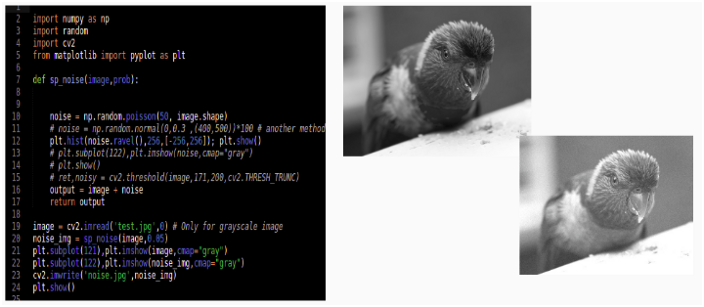

**Salt Noise**: Salt noise is added to an image by addition of random bright (with 255 pixel value) all over the image.

**Pepper Noise**: Salt noise is added to an image by addition of random dark (with 0 pixel value) all over the image.

**Salt and Pepper Noise**: Salt and Pepper noise is added to an image by addition of both random bright (with 255 pixel value) and random dark (with 0 pixel value) all over the image.This model is also known as data drop noise because statistically it drop the original data values [5]. Source: Malfunctioning of camera’s sensor cell.
 
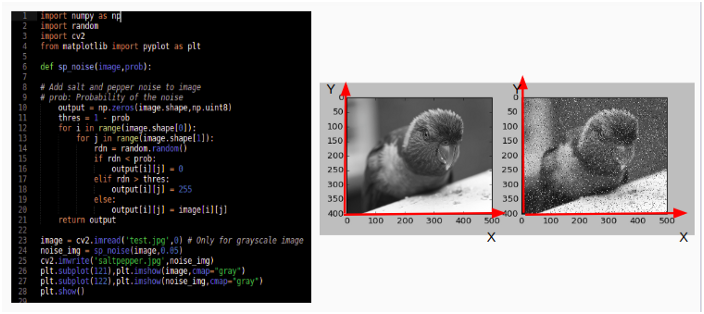

**speckle** :
A fundamental problem in optical and digital holography is the presence of speckle noise in the image reconstruction process. Speckle is a granular noise that inherently exists in an image and degrades its quality. Speckle noise can be generated by multiplying random pixel values with different pixels of an image.

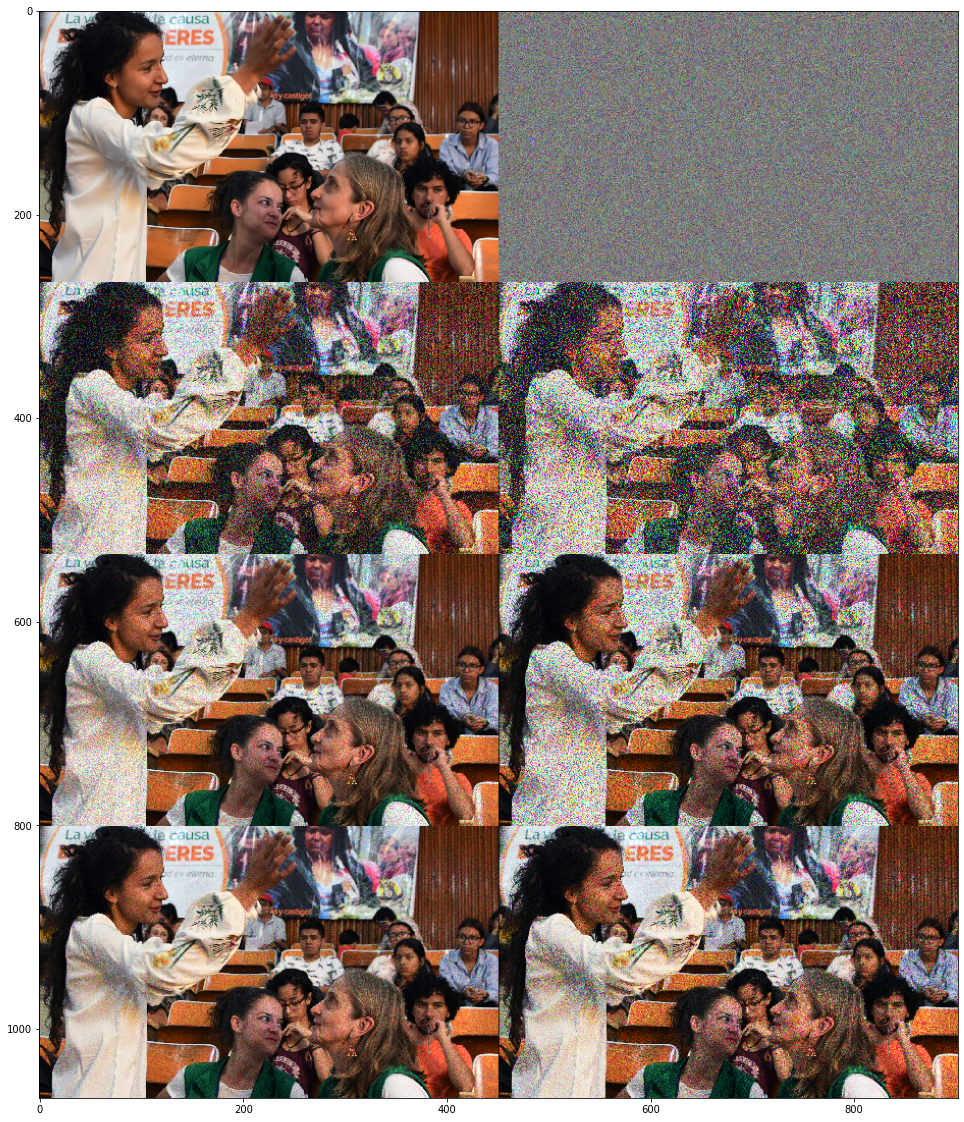

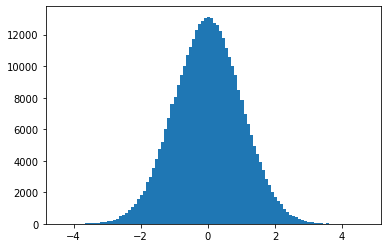

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/noise_main.PNG')[...,::-1]/255.0
noise =  np.random.normal(loc=0, scale=1, size=img.shape)

# noise overlaid over image
noisy = np.clip((img + noise*0.2),0,1)
noisy2 = np.clip((img + noise*0.4),0,1)

# noise multiplied by image:
# whites can go to black but blacks cannot go to white
noisy2mul = np.clip((img*(1 + noise*0.2)),0,1)
noisy4mul = np.clip((img*(1 + noise*0.4)),0,1)

noisy2mul = np.clip((img*(1 + noise*0.2)),0,1)
noisy4mul = np.clip((img*(1 + noise*0.4)),0,1)

# noise multiplied by bottom and top half images,
# whites stay white blacks black, noise is added to center
img2 = img*2
n2 = np.clip(np.where(img2 <= 1, (img2*(1 + noise*0.2)), (1-img2+1)*(1 + noise*0.2)*-1 + 2)/2, 0,1)
n4 = np.clip(np.where(img2 <= 1, (img2*(1 + noise*0.4)), (1-img2+1)*(1 + noise*0.4)*-1 + 2)/2, 0,1)


# norm noise for viz only
noise2 = (noise - noise.min())/(noise.max()-noise.min())
plt.figure(figsize=(20,20))
plt.imshow(np.vstack((np.hstack((img, noise2)),
                      np.hstack((noisy, noisy2)),
                      np.hstack((noisy2mul, noisy4mul)),
                      np.hstack((n2, n4)))))
plt.show()
plt.hist(noise.ravel(), bins=100)
plt.show()

https://gist.github.com/Prasad9/28f6a2df8e8d463c6ddd040f4f6a028a

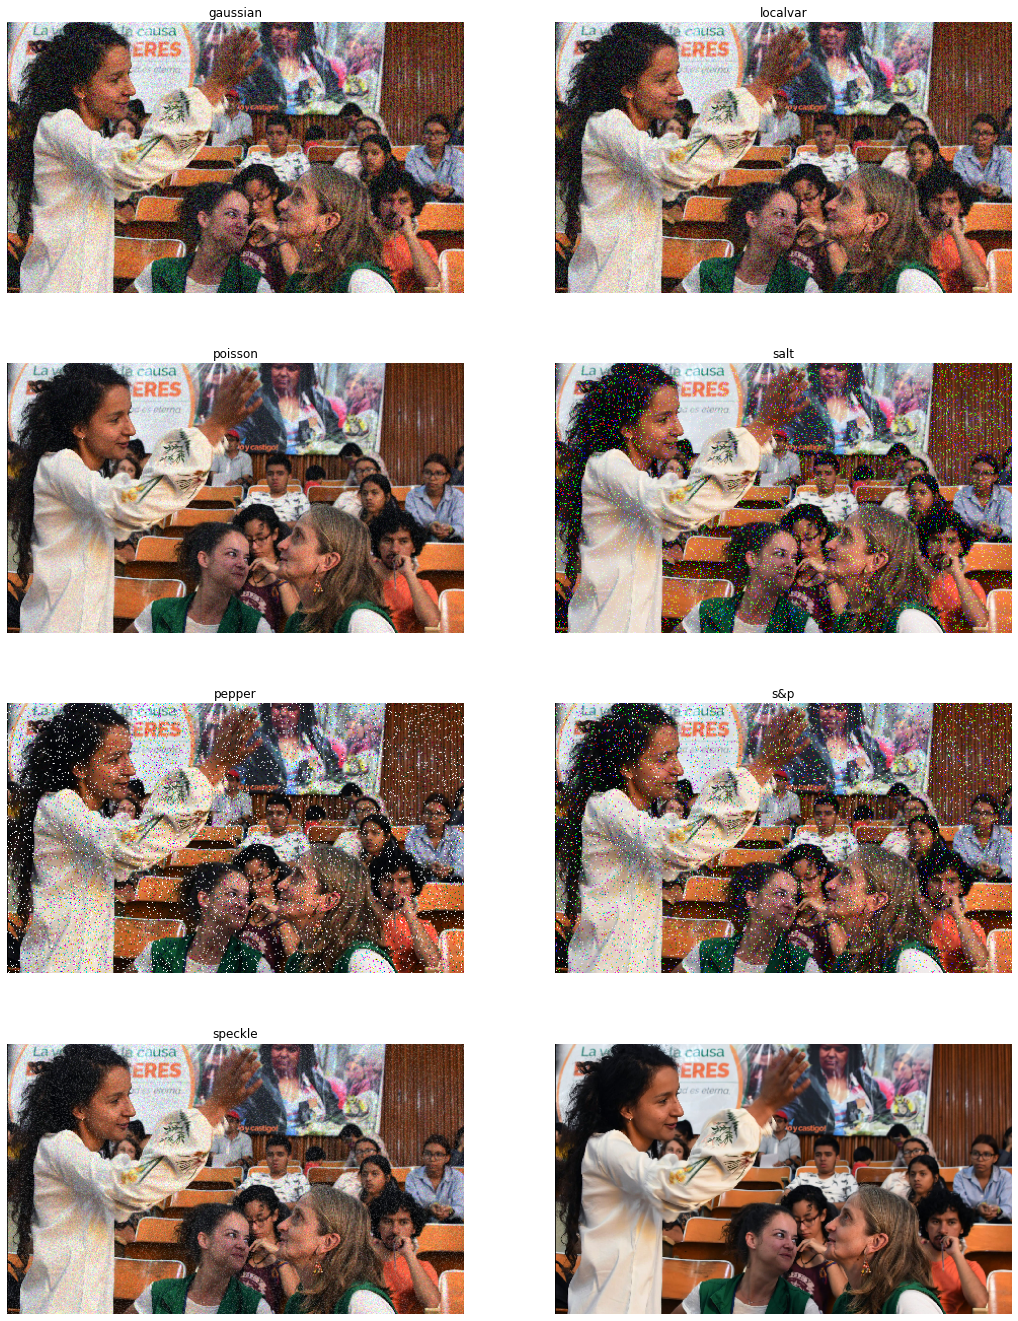

In [ ]:
import skimage
import matplotlib.pyplot as plt
from skimage import io
img = io.imread("/content/noise_main.PNG")/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)x`
plotnoise(img, None, r,c,8)
plt.show()

https://stackoverflow.com/questions/41196754/image-read-through-skimage-io-imread-have-suspicious-shape

https://medium.com/image-vision/noise-in-digital-image-processing-55357c9fab71